In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#python3 -m pip install numpy

In [2]:
def get_df(bot1, bot2):
    dataset = pd.read_csv('./' + bot1 + '_vs_' + bot2 + '.csv')
    # print(dataset.describe())
    print(dataset.head())
    print(dataset[dataset["winner"]==bot1].describe())
    print(dataset[dataset["winner"]==bot2].describe())
    # plt.scatter(dataset["appleEaten0"], dataset["appleEaten1"])

    return dataset

# AdderBoaCobra VS RollOutBot

In [4]:
adder_rollout_df = get_df("AdderBoaCobra", "PUCTBot")
adder_rollout_df

   iteration         winner  appleEaten0  appleEaten1  duration
0          0  AdderBoaCobra            5            3   181.931
1          1            tie            1            1    14.258
2          2  AdderBoaCobra            5            2   429.793
3          3        PUCTBot            2            3   243.763
4          4  AdderBoaCobra            5            1   181.815
       iteration  appleEaten0  appleEaten1    duration
count   25.00000    25.000000    25.000000   25.000000
mean    19.84000     5.960000     4.280000  153.569720
std     12.61507     1.859211     2.245737   74.116847
min      0.00000     3.000000     1.000000   57.279000
25%      9.00000     5.000000     3.000000   98.933000
50%     22.00000     5.000000     3.000000  178.880000
75%     29.00000     7.000000     6.000000  181.405000
max     40.00000    10.000000     9.000000  429.793000
       iteration  appleEaten0  appleEaten1    duration
count  13.000000    13.000000    13.000000   13.000000
mean   20.6

,iteration,winner,appleEaten0,appleEaten1,duration
0,0,AdderBoaCobra,5,3,181.931
1,1,tie,1,1,14.258
2,2,AdderBoaCobra,5,2,429.793
3,3,PUCTBot,2,3,243.763
4,4,AdderBoaCobra,5,1,181.815
5,5,AdderBoaCobra,10,7,181.455
6,6,AdderBoaCobra,4,2,58.241
7,7,AdderBoaCobra,5,3,140.553
8,8,PUCTBot,5,4,97.804
9,9,AdderBoaCobra,4,1,57.279


In [5]:
aggregations = {
    "appleEaten0" : [np.mean, np.sum],
    "appleEaten1" : [np.mean, np.sum],
    "duration" : [np.mean, np.sum],
    "winner" : ["count"],
}

In [6]:
def get_bots_playing(df):
    bots = list(df["winner"].unique())

    try:
        bots.remove("tie")
    except:
        pass
    bot1, bot2 = bots

    return bot1, bot2

In [7]:
def add_score_columns(df):
    """
        create a tournament score for each bot
        win:  3 points
        tie:  1 point
        loss: 0 points

        returns (points: bot 1), (points: bot 2), (games played) 
    """

    bot1, bot2 = get_bots_playing(df)
    
    bot1_points = 0
    bot2_points = 0
    for index, row in df.iterrows():

        if row["winner"] == bot1:
            bot1_points += 3
        elif row["winner"] == bot2:
            bot2_points += 3
        else:
            bot1_points += 1
            bot2_points += 1

    return bot1_points, bot2_points, len(df), len(df) - len(df[df["winner"] == "tie"])

bot1_points, bot2_points, total_games, games_without_ties = add_score_columns(adder_rollout_df)
print(bot1_points, bot2_points, total_games, games_without_ties)

79 43 42 38


In [8]:
def get_running_sum(df):
    """
        return df with running total of apples eaten
    """

    bot1, bot2 = get_bots_playing(df)
    
    bot1_points = 0
    bot2_points = 0
    bot1_apples_total = 0
    bot2_apples_total = 0
    df[f"{bot1} total"] = df["appleEaten0"].cumsum()
    df[f"{bot2} total"] = df["appleEaten1"].cumsum()


    
        
    return df[["iteration", "appleEaten0", f"{bot1} total", "appleEaten1",  f"{bot2} total"]]
    

total_apples_eaten_df = get_running_sum(adder_rollout_df)
# total_apples_eaten_df["iter"]
total_apples_eaten_df

,iteration,appleEaten0,AdderBoaCobra total,appleEaten1,PUCTBot total
0,0,5,5,3,3
1,1,1,6,1,4
2,2,5,11,2,6
3,3,2,13,3,9
4,4,5,18,1,10
5,5,10,28,7,17
6,6,4,32,2,19
7,7,5,37,3,22
8,8,5,42,4,26
9,9,4,46,1,27


<AxesSubplot: xlabel='iteration'>

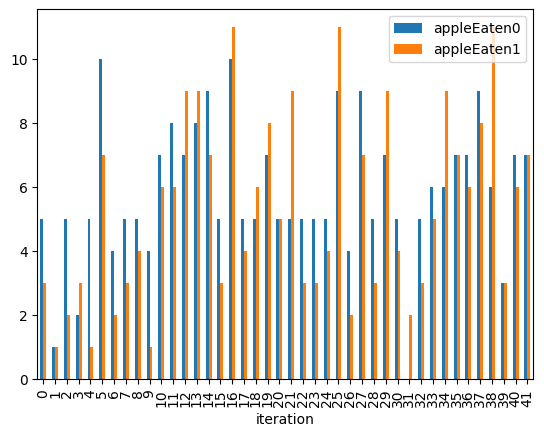

In [12]:
bot1, bot2 = get_bots_playing(adder_rollout_df)
total1 = f"{bot1} total"
total2 = f"{bot2} total"

total_apples_eaten_df.plot(kind="bar", x="iteration", y=["appleEaten0", "appleEaten1"])

In [10]:
# bots playing
bot1, bot2 = get_bots_playing(adder_rollout_df)
# average apples eaten
averages_adder_rollout = adder_rollout_df.groupby("winner").agg(aggregations)
bot1_points, bot2_points, total_games, games_without_ties = add_score_columns(adder_rollout_df)
averages_adder_rollout.loc[bot1 ,("Points (W=3 T=1)")] = bot1_points
averages_adder_rollout.loc[bot2 ,("Points (W=3 T=1)")] = bot2_points

averages_adder_rollout.loc[bot1 ,("Score", "Ties")] = averages_adder_rollout.loc[bot1,("winner", "count")] / total_games
averages_adder_rollout.loc[bot1 ,("Score", "Without Ties")] = averages_adder_rollout.loc[bot1,("winner", "count")] / games_without_ties

averages_adder_rollout.loc[bot2 ,("Score", "Ties")] = averages_adder_rollout.loc[bot2,("winner", "count")] / total_games
averages_adder_rollout.loc[bot2 ,("Score", "Without Ties")] = averages_adder_rollout.loc[bot2,("winner", "count")] / games_without_ties


# averages_adder_rollout.loc[bot1 ,("Score", "Ties")] = bot1_points / total_games
# averages_adder_rollout.loc[bot1 ,("Score", "Without Ties")] = bot1_points / games_without_ties
averages_adder_rollout = averages_adder_rollout.drop(index="tie")
averages_adder_rollout

appleEaten0      appleEaten1         duration           winner  \
                     mean  sum        mean  sum        mean       sum  count   
winner                                                                         
AdderBoaCobra    5.960000  149    4.280000  107  153.569720  3839.243     25   
PUCTBot          5.769231   75    7.384615   96  161.315769  2097.105     13   

              Points (W=3 T=1)     Score               
                                    Ties Without Ties  
winner                                                 
AdderBoaCobra             79.0  0.595238     0.657895  
PUCTBot                   43.0  0.309524     0.342105

# AdderBoaCobra VS RollOutBot

       iteration  appleEaten0  appleEaten1    duration
count   25.00000    25.000000    25.000000   25.000000
mean    19.84000     5.960000     4.280000  153.569720
std     12.61507     1.859211     2.245737   74.116847
min      0.00000     3.000000     1.000000   57.279000
25%      9.00000     5.000000     3.000000   98.933000
50%     22.00000     5.000000     3.000000  178.880000
75%     29.00000     7.000000     6.000000  181.405000
max     40.00000    10.000000     9.000000  429.793000
       iteration  appleEaten0  appleEaten1    duration
count  13.000000    13.000000    13.000000   13.000000
mean   20.615385     5.769231     7.384615  161.315769
std    10.524087     2.681848     3.202563   49.106635
min     3.000000     0.000000     2.000000   53.417000
25%    13.000000     5.000000     4.000000  143.031000
50%    19.000000     6.000000     9.000000  181.180000
75%    30.000000     7.000000     9.000000  181.434000
max    38.000000    10.000000    11.000000  243.763000


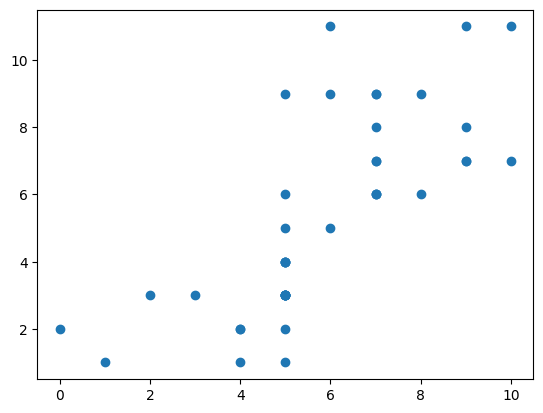

In [29]:
analysis("AdderBoaCobra", "PUCTBot")
